# Sentiment Analysis
## To replicate the sentiment analysis with data from twitter:
### A. Start a notebook instance in machine Learning Lab 
### B. Open the example link and download the source code from Github repository.
### C. Sign up for <a href="https://developer.twitter.com/en/support/twitter-api/developer-account">a developer account in Twitter</a>
### D. Copy, paste and modify the python code file in the notebook
### E. Push the repository to GitHub.

# Step 1: Install and Import Libraries

In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 12.2 MB/s eta 0:00:00a 0:00:01
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 25.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 30.1 MB/s eta 0:00:0000:010:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=3dcf5265c86abb978f2184526fb75b5a64290344fc7b44b42755f1eb745dc7bb
  Stored in directory: /home/ec2-user/.cache/pip/wheels/62/4a/9c/7a46699df9efb845aa116fae5e52d8690fc442fef6d

In [3]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ec2-user/nltk_data...


True

# Step 2: Authentication for Twitter API

In [8]:
# Authentication
consumerKey = "2CJbp8m7Rg26LtZEKAeVXWceG"
consumerSecret = "IbULWKlS0uvhLnMTcFkzvMjDfZUcBM6eVbdLYMUbNafhieX8Y6"
accessToken = "1119095264961126402-8QDK0FvTjGmV7w1hUtGsTyCyH77bNE"
accessTokenSecret = "unheMaBnZsHrcBt3mK1bE8Ib4wtE3tPtAwSA65Y0zWIK0"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Step 3: Getting Tweets With Keyword or Hashtag

In [9]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    # print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
 


Please enter keyword or hashtag to search:  UCM
Please enter how many tweets to analyze:  200


In [10]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  200
positive number:  45
negative number:  65
neutral number:  90


In [6]:
tweet_list[0:20]

,0
0,RT @PHillBaseball: Roosters and the Tigers fac...
1,"Baseball Warrensburg-Latham 8, St. Teresa 4"
2,Photos from Wednesday's Adirondack League soft...
3,RT @glensfallsse: How about some softball phot...
4,"How about some softball photos, from today's L..."
5,Photos from Wednesday's Adirondack League soft...
6,"Baseball final: Warrensburg 15, Lake George 5...."
7,"Softball Warrensburg-Latham 13, St. Teresa 3"
8,@JeremiahCabuya3 gets the start at UCM so we m...
9,RT @OGWhyBother: Photos from our most recent s...


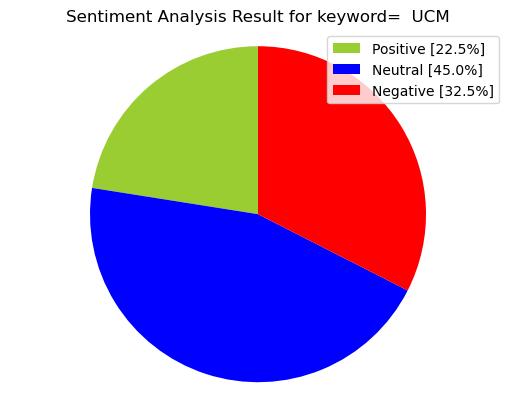

In [11]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [12]:
tweet_list.drop_duplicates(inplace = True)

# Extracting text values

In [13]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @UCMccinf: ▶️ Hoy @TribunaComplu se hace ec...,RT @UCMccinf: ▶️ Hoy @TribunaComplu se hace ec...
1,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
4,RT @axel03aldino: Axel Aldino\nUCM QB Transfer...,RT @axel03aldino: Axel Aldino\nUCM QB Transfer...
5,"RT @Multiverso_GK: Y así cierra, una de las me...","RT @Multiverso_GK: Y así cierra, una de las me..."
6,RT @UCMMULES: TRACK &amp; FIELD PREVIEW\n\n@UC...,RT @UCMMULES: TRACK &amp; FIELD PREVIEW\n\n@UC...
...,...,...
186,No he visto la pelicula pero dicen muchos que ...,No he visto la pelicula pero dicen muchos que ...
188,#ALaPatriaManosYCorazón https://t.co/WsUdrhmf7J,#ALaPatriaManosYCorazón https://t.co/WsUdrhmf7J
190,RT @dsn: HOY➡️04mayo2023 «Jornadas sobre el #S...,RT @dsn: HOY➡️04mayo2023 «Jornadas sobre el #S...
193,@CalixtoOrozco @adolfo_cima @Aleidacr84 @Ana_H...,@CalixtoOrozco @adolfo_cima @Aleidacr84 @Ana_H...


In [14]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @UCMccinf: ▶️ Hoy @TribunaComplu se hace ec...,hoy se hace eco de la presentaci n del l...
1,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,en honor a star wars por el maythe4thbew...
4,RT @axel03aldino: Axel Aldino\nUCM QB Transfer...,axel aldino ucm qb transfer 3 years eligibili...
5,"RT @Multiverso_GK: Y así cierra, una de las me...",y as cierra una de las mejores trilog as de...
6,RT @UCMMULES: TRACK &amp; FIELD PREVIEW\n\n@UC...,track amp field preview is ready to comp...
7,#VidayEstilo 🍿 | Las 7 mejores películas de Ma...,vidayestilo las 7 mejores pel culas de ma...
8,RT @Johan13580: MAÑANA IRE A VER A MI EQUIPO F...,ma ana ire a ver a mi equipo favorito del ucm...
11,EN HONOR A STAR WARS🙌\n\nPor el #MayThe4thBeWi...,en honor a star wars por el maythe4thbewith...
12,"@yadier_ortiz Ya la vi, y sólo puedo decir que...",ortiz ya la vi y s lo puedo decir que es to...
13,Se supone que es estudiante de la UCM y en teo...,se supone que es estudiante de la ucm y en teo...


In [15]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

/tmp/ipykernel_8071/4219357815.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @UCMccinf: ▶️ Hoy @TribunaComplu se hace ec...,hoy se hace eco de la presentaci n del l...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
1,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,en honor a star wars por el maythe4thbew...,0.000000,0.066667,negative,0.165,0.688,0.147,-0.1027
4,RT @axel03aldino: Axel Aldino\nUCM QB Transfer...,axel aldino ucm qb transfer 3 years eligibili...,0.136364,0.454545,neutral,0.000,1.000,0.000,0.0000
5,"RT @Multiverso_GK: Y así cierra, una de las me...",y as cierra una de las mejores trilog as de...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
6,RT @UCMMULES: TRACK &amp; FIELD PREVIEW\n\n@UC...,track amp field preview is ready to comp...,0.200000,0.500000,positive,0.000,0.749,0.251,0.6908
7,#VidayEstilo 🍿 | Las 7 mejores películas de Ma...,vidayestilo las 7 mejores pel culas de ma...,0.000000,0.000000,positive,0.000,0.823,0.177,0.4215
8,RT @Johan13580: MAÑANA IRE A VER A MI EQUIPO F...,ma ana ire a ver a mi equipo favorito del ucm...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
11,EN HONOR A STAR WARS🙌\n\nPor el #MayThe4thBeWi...,en honor a star wars por el maythe4thbewith...,0.000000,0.066667,negative,0.182,0.657,0.162,-0.1027
12,"@yadier_ortiz Ya la vi, y sólo puedo decir que...",ortiz ya la vi y s lo puedo decir que es to...,0.250000,0.750000,positive,0.000,0.921,0.079,0.2023
13,Se supone que es estudiante de la UCM y en teo...,se supone que es estudiante de la ucm y en teo...,0.000000,0.000000,negative,0.141,0.859,0.000,-0.5574


In [16]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [17]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [18]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,48,59.26
positive,18,22.22
negative,15,18.52


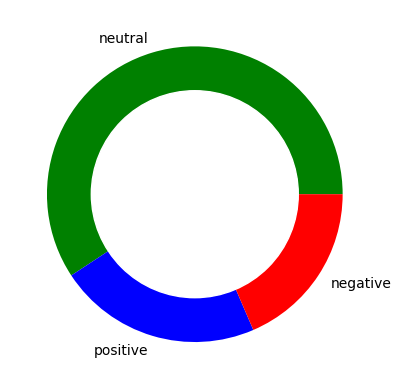

In [19]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [20]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", width=600, height=400,               
                  max_words=300,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    
    plt.imshow(wc)
    plt.show()



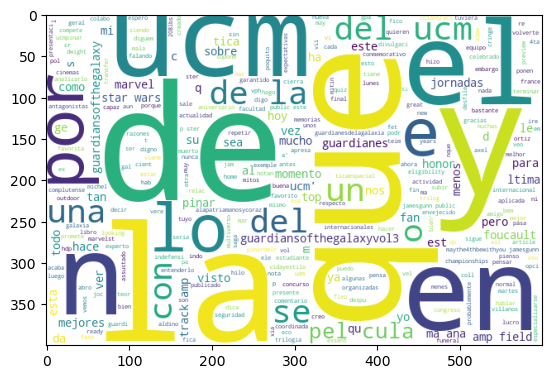

In [21]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

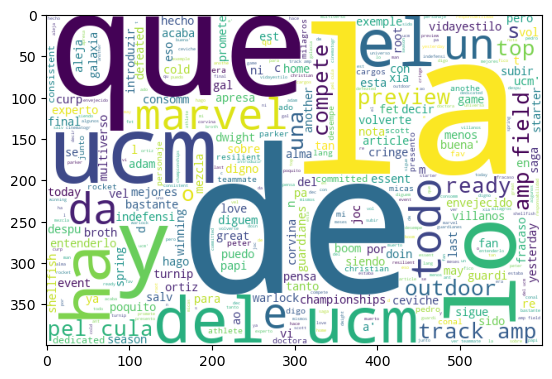

In [22]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

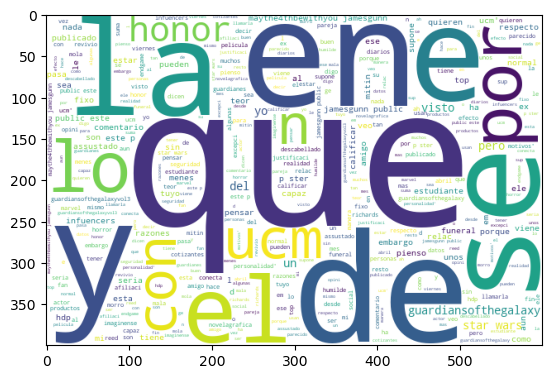

In [23]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

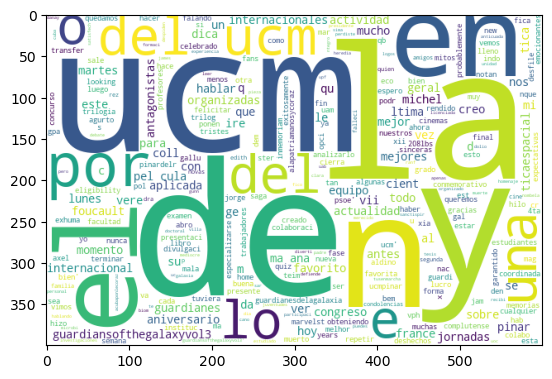

In [24]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)